# Teste 3

#### Beatriz Evelbauer 

Queremos calcular 

$$ \int_0^{T} W_t dW_t \approx \sum_{j=1}^{n} W_{t_{j-1}} (W_{t_j} - W_{t_{j-1}}) $$

com os seguintes parâmetros:

* $T=1$ - tempo final
* $m=100$ - número de amostras de $W_t$
* $n=100$ - número de pontos na malha



In [12]:
using Plots, Distributions, Random
theme(:ggplot2)

rng = MersenneTwister(1234)

MersenneTwister(1234)

Primeiro vamos gerar as amostras do processo de Wiener.

In [65]:
# definindo parametros
T = 1
m = 100
n = 100

# calculando todos os tempos 
ts = [j*T/n for j ∈ 0:n]
nothing

In [67]:
# gerando as m amostras 
Wts = Array{Float64}(undef,n+1,m)
Wts[1,:] = zeros(n) # primeira entrada é sempre zero

for i ∈ 1:m 
    aux = rand(n+1) .* .√ts
    Wts[1:n+1,i] = aux 
end

In [68]:
ito_Wts = zeros(m) # guardando os resultados da integral

for i ∈ 1:m 
    dW = Wts[2:n+1,i] .- Wts[1:n,i] 
    ito_Wts[i] = sum(Wts[1:n,i] .* dW)
end


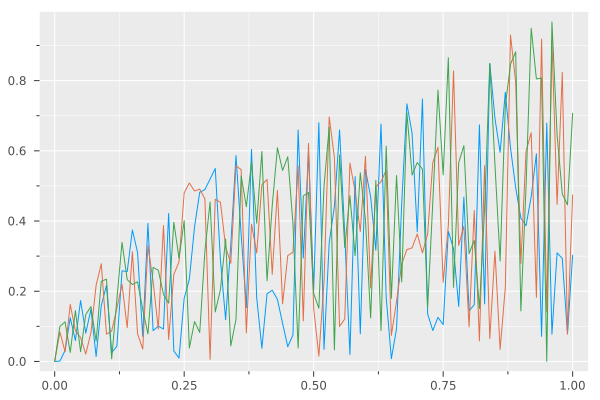

In [69]:
plot(ts,Wts[:,1:3],legend=false)

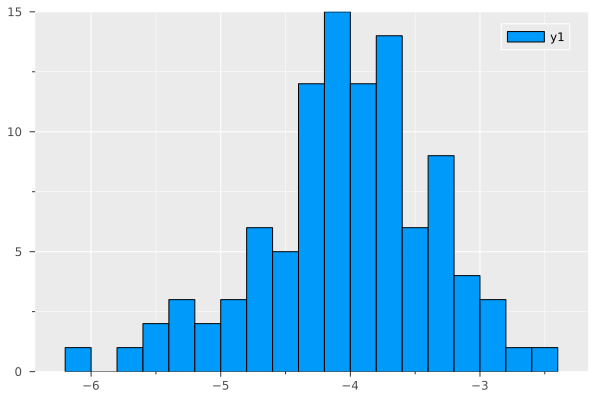

In [70]:
histogram(ito_Wts, bins=20)

Agora, vamos comparar aos histogramas de

$$\frac{W_T^2}{2} - \frac{T}{2} $$

e de 

$$ - \frac{T}{2} + \frac{1}{2} \Gamma \left( \frac{1}{2}, T \right) $$